In [ ]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

In [ ]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-100, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 5; day=1
Period for indexes: 1924-05-01 to 2024-05-01 


#Answers
* A1: 286
* A2: 28
* A3: 47
* A4: 1

# Q1: IPOs: download and process the fillings

In [ ]:
# https://www.dfinsolutions.com/knowledge-hub/thought-leadership/knowledge-resources/what-s-1-ipo-filing#:~:text=An%20S%2D1%20Form%20is,the%20company%20with%20the%20SEC.

# Q1: Data processing from Web.
# Use the [Code Snippet 1] example to get the data from Web:  https://stockanalysis.com/ipos/filings/

# Convert 'Filing Date' to datetime(),
# Shares Offered to float64 (if '-': populate with NaNs)
# Define a new field 'Avg_price', which equals to NaN (if no price specified), to price (if 1 number), or to the average of 2 prices (if 2 numbers in the range)
# You may be inspired by the function extract_numbers() in [Code Snippet 4], or you can write your own function to "parse" a string

# Define column "Shares_offered_value", which equals to "Shares Offered" * "Avg_price" (when both columns are defined, otherwise it's NaN)

# Find the total SUM in $m (closest INTEGER number) for all Fillings during 2023, which happened on Fridays (.dt.dayofweek()==4)


import pandas as pd
import requests

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
}

url = "https://stockanalysis.com/ipos/filings/"
response = requests.get(url, headers=headers)

filings_dfs = pd.read_html(response.text)

In [ ]:
df = filings_dfs[0]

In [ ]:
df

,Filing Date,Symbol,Company Name,Price Range,Shares Offered
0,"Apr 26, 2024",EURK,Eureka Acquisition Corp,$10.00,5000000
1,"Apr 26, 2024",HDL,Super Hi International Holding Ltd.,-,-
2,"Apr 22, 2024",DRJT,Derun Group Inc,$5.00,-
3,"Apr 19, 2024",GPAT,GP-Act III Acquisition Corp.,$10.00,25000000
4,"Apr 16, 2024",JLJT,Jialiang Holdings Ltd,$5.00,-
...,...,...,...,...,...
321,"Jan 21, 2020",GOXS,"Goxus, Inc.",$8.00 - $10.00,1500000
322,"Jan 21, 2020",UTXO,"UTXO Acquisition, Inc.",$10.00,5000000
323,"Dec 9, 2019",LOHA,Loha Co. Ltd,$8.00 - $10.00,2500000
324,"Oct 4, 2019",ZGHB,China Eco-Materials Group Co. Limited,$4.00,4300000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Filing Date     326 non-null    object
 1   Symbol          326 non-null    object
 2   Company Name    326 non-null    object
 3   Price Range     326 non-null    object
 4   Shares Offered  326 non-null    object
dtypes: object(5)
memory usage: 12.9+ KB


In [ ]:
df

,Filing Date,Symbol,Company Name,Price Range,Shares Offered
0,"Apr 26, 2024",EURK,Eureka Acquisition Corp,$10.00,5000000
1,"Apr 26, 2024",HDL,Super Hi International Holding Ltd.,-,-
2,"Apr 22, 2024",DRJT,Derun Group Inc,$5.00,-
3,"Apr 19, 2024",GPAT,GP-Act III Acquisition Corp.,$10.00,25000000
4,"Apr 16, 2024",JLJT,Jialiang Holdings Ltd,$5.00,-
...,...,...,...,...,...
321,"Jan 21, 2020",GOXS,"Goxus, Inc.",$8.00 - $10.00,1500000
322,"Jan 21, 2020",UTXO,"UTXO Acquisition, Inc.",$10.00,5000000
323,"Dec 9, 2019",LOHA,Loha Co. Ltd,$8.00 - $10.00,2500000
324,"Oct 4, 2019",ZGHB,China Eco-Materials Group Co. Limited,$4.00,4300000


In [ ]:
import re

def convert_price_range_to_avg(input_str):
    # Regular expression to extract numerical values
    pattern = r'\$?(\d+\.\d+)'

    # Find all matches
    matches = re.findall(pattern, input_str)

    # If no matches found, return None
    if not matches:
        return None

    # Convert matches to float
    prices = [float(match) for match in matches]

    # If only one price found, return it
    if len(prices) == 1:
        return prices[0]

    # If range found, calculate average
    avg_price = sum(prices) / len(prices)
    return avg_price

# Test cases
print(convert_price_range_to_avg('-'))                  # None
print(convert_price_range_to_avg('$5.00'))              # 5.0
print(convert_price_range_to_avg('$8.00-$10.00'))      # 9.0

None
5.0
9.0


In [ ]:
# convert to datetime
df['Filing Date'] = pd.to_datetime(df['Filing Date'])

In [ ]:
# Friday = 4 (dt.dayofweek==Friday)
df['Filing Date'].dt.dayofweek.value_counts()

Filing Date
4    89
1    68
3    58
0    57
2    54
Name: count, dtype: int64

In [ ]:
df['Avg_price'] = df['Price Range'].apply(lambda x: convert_price_range_to_avg(x))

In [ ]:
df['Shares Offered'] = pd.to_numeric(df['Shares Offered'],errors='coerce')

In [ ]:
df.head(20)

,Filing Date,Symbol,Company Name,Price Range,Shares Offered,Avg_price
0,2024-04-26,EURK,Eureka Acquisition Corp,$10.00,5000000.0,10.00
1,2024-04-26,HDL,Super Hi International Holding Ltd.,-,NaN,NaN
2,2024-04-22,DRJT,Derun Group Inc,$5.00,NaN,5.00
3,2024-04-19,GPAT,GP-Act III Acquisition Corp.,$10.00,25000000.0,10.00
4,2024-04-16,JLJT,Jialiang Holdings Ltd,$5.00,NaN,5.00
5,2024-04-16,GGL,Games Global Limited,-,NaN,NaN
6,2024-04-15,GAUZ,Gauzy Ltd.,-,NaN,NaN
7,2024-04-12,BOW,Bowhead Specialty Holdings Inc.,-,NaN,NaN
8,2024-04-05,SPHL,Springview Holdings Ltd,$4.00 - $5.00,2000000.0,4.50
9,2024-04-02,FFFZ,Fuxing China Group Limited,$4.00 - $4.50,2000000.0,4.25


In [ ]:
filtered_df = df[(df['Filing Date'].dt.year==2023) & (df['Filing Date'].dt.dayofweek==4)]
filtered_df.shape

(32, 6)

In [ ]:
filtered_df.loc[:,'Shares_offered_value'] = filtered_df['Shares Offered'] * filtered_df['Avg_price']
filtered_df

<ipython-input-15-cdf097aa51e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:,'Shares_offered_value'] = filtered_df['Shares Offered'] * filtered_df['Avg_price']


,Filing Date,Symbol,Company Name,Price Range,Shares Offered,Avg_price,Shares_offered_value
49,2023-12-29,LEC,Lafayette Energy Corp,$3.50 - $4.50,1200000.0,4.00,4800000.0
50,2023-12-29,EPSM,Epsium Enterprise Limited,-,NaN,NaN,NaN
53,2023-12-22,CHLW,Chun Hui Le Wan International Holding Group Ltd,-,NaN,NaN,NaN
54,2023-12-22,LZMH,LZ Technology Holdings Limited,-,NaN,NaN,NaN
59,2023-12-15,GIT,Going International Holding Company Limited,-,NaN,NaN,NaN
61,2023-12-08,ENGS,Energys Group Limited,$4.00 - $6.00,2000000.0,5.00,10000000.0
62,2023-12-08,LNKS,Linkers Industries Limited,$4.00 - $6.00,2200000.0,5.00,11000000.0
82,2023-10-27,RAY,Raytech Holding Limited,$4.00 - $5.00,1500000.0,4.50,6750000.0
89,2023-10-13,ORIS,Oriental Rise Holdings Limited,$4.00,2000000.0,4.00,8000000.0
92,2023-10-06,QMMM,QMMM Holdings Limited,$4.00,2125000.0,4.00,8500000.0


In [ ]:
filtered_df.Shares_offered_value.isnull().value_counts()

Shares_offered_value
False    25
True      7
Name: count, dtype: int64

In [ ]:
# 293M was offered in 2023 during IPOs on Fridays
filtered_df.Shares_offered_value.sum()/1e6

285.7

# Q2: IPOs: "Fixed days hold" strategy

In [ ]:
# Reuse the [Code Snippet 1] to get list of IPOs from 2023 and 2024
# (URLs: https://stockanalysis.com/ipos/2023/ and https://stockanalysis.com/ipos/2024/)

# Get all OHLCV daily prices on all (xx) tickers

# Let's assume you managed to buy on a first day at the [Adj Close price].
# Your strategy is to hold exactly X (X is between 1 and 30) and sell at the Adj. Close price in X days (if X=1 --> you sell on the next day)
# Find X, when the MEDIAN growth (not mean/average, but 50% quantile if you use .describe() function) for all IPOs in 2023 is the best.

# (additional: try this X for 2024 IPOs from Jan and Feb, do you see the similar distribution of returns? Does the median return is positive and similar?)
# do you see the same jump of price (for a avg/median case) in a few days after the IPO?

In [ ]:
import pandas as pd
import requests

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
}

url = "https://stockanalysis.com/ipos/2023/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)

In [ ]:
ipos_2023 = ipo_dfs[0]
ipos_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      154 non-null    object
 1   Symbol        154 non-null    object
 2   Company Name  154 non-null    object
 3   IPO Price     154 non-null    object
 4   Current       154 non-null    object
 5   Return        154 non-null    object
dtypes: object(6)
memory usage: 7.3+ KB


In [ ]:
url = "https://stockanalysis.com/ipos/2024/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)

In [ ]:
ipos_2024 = ipo_dfs[0]
ipos_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      63 non-null     object
 1   Symbol        63 non-null     object
 2   Company Name  63 non-null     object
 3   IPO Price     63 non-null     object
 4   Current       63 non-null     object
 5   Return        63 non-null     object
dtypes: object(6)
memory usage: 3.1+ KB


In [ ]:
stacked_ipos_df = pd.concat([ipos_2024, ipos_2023], ignore_index=True)

In [ ]:
stacked_ipos_df[stacked_ipos_df.Symbol.isin(['IBAC','BKHA'])]

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
23,"Mar 26, 2024",IBAC,IB Acquisition Corp.,$10.00,$10.05,0.50%
26,"Mar 21, 2024",BKHA,Black Hawk Acquisition Corporation,$10.00,$10.29,2.90%


In [ ]:
# convert to datetime
stacked_ipos_df['IPO Date'] = pd.to_datetime(stacked_ipos_df['IPO Date'])

In [ ]:
TICKERS = [e for e in stacked_ipos_df[stacked_ipos_df['IPO Date']<'2024-03-01'].Symbol.to_list()]
len(TICKERS)

185

In [ ]:
def correct_ticker(ticker:str):
  map = {'IBAC':'IBACU',
         'BKHA':'BKHAU',
         'PTHR':'PTHRU'}
  if ticker in map.keys():
    return map[ticker]

  return ticker

In [ ]:
import time


In [ ]:
def get_stocks_df(TICKERS):

  stocks_df = pd.DataFrame({'A' : []})

  for i,ticker in enumerate(TICKERS):
    if ticker in ['RYZB']:  # not available, or delisted
      continue
    ticker = correct_ticker(ticker)

    print(i,ticker)

    # Work with stock prices
    historyPrices = yf.download(tickers = ticker,
                      period = "max",
                      interval = "1d")

    # generate features for historical prices, and what we want to predict
    historyPrices['Ticker'] = ticker
    historyPrices['Year']= historyPrices.index.year
    historyPrices['Month'] = historyPrices.index.month
    historyPrices['Weekday'] = historyPrices.index.weekday
    historyPrices['Date'] = historyPrices.index.date

    # historical returns
    for i in [1,3,7,30,90,365]:
      historyPrices['growth_'+str(i)+'d'] = historyPrices['Adj Close'] / historyPrices['Adj Close'].shift(i)
    historyPrices['growth_future_5d'] = historyPrices['Adj Close'].shift(-5) / historyPrices['Adj Close']

    # Technical indicators
    # SimpleMovingAverage 10 days and 20 days
    historyPrices['SMA10']= historyPrices['Close'].rolling(10).mean()
    historyPrices['SMA20']= historyPrices['Close'].rolling(20).mean()
    historyPrices['growing_moving_average'] = np.where(historyPrices['SMA10'] > historyPrices['SMA20'], 1, 0)
    historyPrices['high_minus_low_relative'] = (historyPrices.High - historyPrices.Low) / historyPrices['Adj Close']

    # 30d rolling volatility : https://ycharts.com/glossary/terms/rolling_vol_30
    historyPrices['volatility'] =   historyPrices['Adj Close'].rolling(30).std() * np.sqrt(252)

    # what we want to predict
    historyPrices['is_positive_growth_5d_future'] = np.where(historyPrices['growth_future_5d'] > 1, 1, 0)

    # sleep 1 sec between downloads - not to overload the API server
    time.sleep(0.5)


    if stocks_df.empty:
      stocks_df = historyPrices
    else:
      stocks_df = pd.concat([stocks_df, historyPrices], ignore_index=True)
  return stocks_df

In [ ]:
stocks_df = get_stocks_df(TICKERS)
stocks_df.info()

0 SMXT


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 VHAI



[*********************100%%**********************]  1 of 1 completed

2 DYCQ



[*********************100%%**********************]  1 of 1 completed

3 CHRO



[*********************100%%**********************]  1 of 1 completed

4 UMAC



[*********************100%%**********************]  1 of 1 completed

5 TBBB



[*********************100%%**********************]  1 of 1 completed

6 MGX



[*********************100%%**********************]  1 of 1 completed

7 HLXB



[*********************100%%**********************]  1 of 1 completed

8 TELO



[*********************100%%**********************]  1 of 1 completed

9 KYTX



[*********************100%%**********************]  1 of 1 completed

10 PMNT



[*********************100%%**********************]  1 of 1 completed

11 AHR



[*********************100%%**********************]  1 of 1 completed

12 LEGT



[*********************100%%**********************]  1 of 1 completed

13 ANRO



[*********************100%%**********************]  1 of 1 completed

14 GUTS



[*********************100%%**********************]  1 of 1 completed

15 AS



[*********************100%%**********************]  1 of 1 completed

16 FBLG



[*********************100%%**********************]  1 of 1 completed

17 BTSG



[*********************100%%**********************]  1 of 1 completed

18 AVBP



[*********************100%%**********************]  1 of 1 completed

19 HAO



[*********************100%%**********************]  1 of 1 completed

20 CGON



[*********************100%%**********************]  1 of 1 completed

21 YIBO



[*********************100%%**********************]  1 of 1 completed

22 SUGP



[*********************100%%**********************]  1 of 1 completed

23 JL



[*********************100%%**********************]  1 of 1 completed

24 KSPI



[*********************100%%**********************]  1 of 1 completed

25 JVSA



[*********************100%%**********************]  1 of 1 completed

26 PSBD



[*********************100%%**********************]  1 of 1 completed

27 CCTG



[*********************100%%**********************]  1 of 1 completed

28 SYNX



[*********************100%%**********************]  1 of 1 completed

29 SDHC



[*********************100%%**********************]  1 of 1 completed

30 ROMA



[*********************100%%**********************]  1 of 1 completed

31 IROH



[*********************100%%**********************]  1 of 1 completed

32 LGCB



[*********************100%%**********************]  1 of 1 completed

33 ZKH



[*********************100%%**********************]  1 of 1 completed

34 BAYA



[*********************100%%**********************]  1 of 1 completed

35 INHD



[*********************100%%**********************]  1 of 1 completed

36 AFJK



[*********************100%%**********************]  1 of 1 completed

37 GSIW



[*********************100%%**********************]  1 of 1 completed

38 FEBO



[*********************100%%**********************]  1 of 1 completed

39 CLBR



[*********************100%%**********************]  1 of 1 completed

40 ELAB



[*********************100%%**********************]  1 of 1 completed

41 RR



[*********************100%%**********************]  1 of 1 completed

42 DDC



[*********************100%%**********************]  1 of 1 completed

43 SHIM



[*********************100%%**********************]  1 of 1 completed

44 GLAC



[*********************100%%**********************]  1 of 1 completed

45 SGN



[*********************100%%**********************]  1 of 1 completed

46 HG



[*********************100%%**********************]  1 of 1 completed

47 CRGX



[*********************100%%**********************]  1 of 1 completed

48 ANSC



[*********************100%%**********************]  1 of 1 completed

49 AITR



[*********************100%%**********************]  1 of 1 completed

50 GVH



[*********************100%%**********************]  1 of 1 completed

51 LXEO



[*********************100%%**********************]  1 of 1 completed

52 PAPL



[*********************100%%**********************]  1 of 1 completed

53 ATGL



[*********************100%%**********************]  1 of 1 completed

54 MNR



[*********************100%%**********************]  1 of 1 completed

55 WBUY



[*********************100%%**********************]  1 of 1 completed

56 NCL



[*********************100%%**********************]  1 of 1 completed

57 BIRK



[*********************100%%**********************]  1 of 1 completed

58 GMM



[*********************100%%**********************]  1 of 1 completed

59 LRHC



[*********************100%%**********************]  1 of 1 completed

60 PMEC



[*********************100%%**********************]  1 of 1 completed

61 GPAK



[*********************100%%**********************]  1 of 1 completed

62 SPKL



[*********************100%%**********************]  1 of 1 completed

63 QETA



[*********************100%%**********************]  1 of 1 completed

64 MSS



[*********************100%%**********************]  1 of 1 completed

65 ANL



[*********************100%%**********************]  1 of 1 completed

66 SYRA



[*********************100%%**********************]  1 of 1 completed

67 VSME



[*********************100%%**********************]  1 of 1 completed

68 LRE



[*********************100%%**********************]  1 of 1 completed

69 TURB



[*********************100%%**********************]  1 of 1 completed

70 MDBH



[*********************100%%**********************]  1 of 1 completed

71 KVYO



[*********************100%%**********************]  1 of 1 completed

72 CART



[*********************100%%**********************]  1 of 1 completed

73 DTCK



[*********************100%%**********************]  1 of 1 completed

75 NMRA


76 ARM


[*********************100%%**********************]  1 of 1 completed


77 SPPL


[*********************100%%**********************]  1 of 1 completed


78 NWGL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

79 SWIN



[*********************100%%**********************]  1 of 1 completed

80 IVP



[*********************100%%**********************]  1 of 1 completed

81 NNAG


82 SRM


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

83 SPGC



[*********************100%%**********************]  1 of 1 completed

84 LQR



[*********************100%%**********************]  1 of 1 completed

85 NRXS


86 FTEL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

87 MIRA


88 PXDT


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

89 CTNT


90 HRYU


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

91 SRFM



[*********************100%%**********************]  1 of 1 completed

92 PRZO



[*********************100%%**********************]  1 of 1 completed

93 HYAC



[*********************100%%**********************]  1 of 1 completed

94 KVAC



[*********************100%%**********************]  1 of 1 completed

95 ELWS



[*********************100%%**********************]  1 of 1 completed

96 JNVR



[*********************100%%**********************]  1 of 1 completed

97 WRNT



[*********************100%%**********************]  1 of 1 completed

98 TSBX



[*********************100%%**********************]  1 of 1 completed

99 ODD



[*********************100%%**********************]  1 of 1 completed

100 APGE



[*********************100%%**********************]  1 of 1 completed

101 NETD



[*********************100%%**********************]  1 of 1 completed

102 SGMT



[*********************100%%**********************]  1 of 1 completed

103 BOWN


104 SXTP


[*********************100%%**********************]  1 of 1 completed


105 PWM


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

106 VTMX


107 INTS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

108 SVV


109 KGS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

110 FIHL


111 GENK


[*********************100%%**********************]  1 of 1 completed


112 BUJA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

113 BOF



[*********************100%%**********************]  1 of 1 completed

114 AZTR



[*********************100%%**********************]  1 of 1 completed

115 CAVA



[*********************100%%**********************]  1 of 1 completed

116 ESHA


117 ATMU


[*********************100%%**********************]  1 of 1 completed


118 ATS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

119 IPXX


120 CWD


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

121 SGE



[*********************100%%**********************]  1 of 1 completed

122 SLRN



[*********************100%%**********************]  1 of 1 completed

123 ALCY



[*********************100%%**********************]  1 of 1 completed

124 KVUE



[*********************100%%**********************]  1 of 1 completed

125 GODN


126 TRNR


[*********************100%%**********************]  1 of 1 completed


127 AACT


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

128 JYD



[*********************100%%**********************]  1 of 1 completed

129 USGO



[*********************100%%**********************]  1 of 1 completed

130 UCAR



[*********************100%%**********************]  1 of 1 completed

131 WLGS



[*********************100%%**********************]  1 of 1 completed

132 TPET



[*********************100%%**********************]  1 of 1 completed

133 TCJH



[*********************100%%**********************]  1 of 1 completed

134 GDTC


135 VCIG


[*********************100%%**********************]  1 of 1 completed


136 GDHG


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

137 ARBB


138 ISPR


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

139 MGIH



[*********************100%%**********************]  1 of 1 completed

140 MWG



[*********************100%%**********************]  1 of 1 completed

141 HSHP



[*********************100%%**********************]  1 of 1 completed

142 SFWL



[*********************100%%**********************]  1 of 1 completed

143 SYT



[*********************100%%**********************]  1 of 1 completed

144 HKIT



[*********************100%%**********************]  1 of 1 completed

145 CHSN



[*********************100%%**********************]  1 of 1 completed

146 TBMC


147 HLP


[*********************100%%**********************]  1 of 1 completed


148 ZJYL


[*********************100%%**********************]  1 of 1 completed


149 TMTC


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

150 YGFGF



[*********************100%%**********************]  1 of 1 completed

151 OAKU



[*********************100%%**********************]  1 of 1 completed

152 BANL



[*********************100%%**********************]  1 of 1 completed

153 OMH



[*********************100%%**********************]  1 of 1 completed

154 MGRX



[*********************100%%**********************]  1 of 1 completed

155 FORL



[*********************100%%**********************]  1 of 1 completed

156 ICG


157 IZM


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

158 AESI



[*********************100%%**********************]  1 of 1 completed

159 AIXI


160 SBXC


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

161 BMR



[*********************100%%**********************]  1 of 1 completed

162 DIST


163 GXAI


[*********************100%%**********************]  1 of 1 completed


164 MARX


[*********************100%%**********************]  1 of 1 completed


165 BFRG


[*********************100%%**********************]  1 of 1 completed


166 ENLT


[*********************100%%**********************]  1 of 1 completed


167 MLYS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

168 PTHRU



[*********************100%%**********************]  1 of 1 completed

169 BLAC



[*********************100%%**********************]  1 of 1 completed

170 NXT


171 HSAI


[*********************100%%**********************]  1 of 1 completed


172 LSDI


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

173 LICN


174 GPCR


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

175 ASST



[*********************100%%**********************]  1 of 1 completed

176 CETU



[*********************100%%**********************]  1 of 1 completed

177 TXO



[*********************100%%**********************]  1 of 1 completed

178 BREA



[*********************100%%**********************]  1 of 1 completed

179 GNLX



[*********************100%%**********************]  1 of 1 completed

180 QSG



[*********************100%%**********************]  1 of 1 completed

181 CVKD



[*********************100%%**********************]  1 of 1 completed

182 SKWD



[*********************100%%**********************]  1 of 1 completed

183 ISRL



[*********************100%%**********************]  1 of 1 completed

184 MGOL


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36802 entries, 0 to 36801
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Open                          36802 non-null  float64
 1   High                          36802 non-null  float64
 2   Low                           36802 non-null  float64
 3   Close                         36802 non-null  float64
 4   Adj Close                     36802 non-null  float64
 5   Volume                        36802 non-null  int64  
 6   Ticker                        36802 non-null  object 
 7   Year                          36802 non-null  int32  
 8   Month                         36802 non-null  int32  
 9   Weekday                       36802 non-null  int32  
 10  Date                          36802 non-null  object 
 11  growth_1d                     36618 non-null  float64
 12  growth_3d                     36250 non-null  float64
 13  g

In [ ]:
stocks_df.Ticker.nunique()

184

In [ ]:
stocks_df.head()

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,growth_30d,growth_90d,growth_365d,growth_future_5d,SMA10,SMA20,growing_moving_average,high_minus_low_relative,volatility,is_positive_growth_5d_future
0,3.50,9.35,3.500,8.00,8.00,2840400,SMXT,2024,2,1,...,NaN,NaN,NaN,0.657500,NaN,NaN,0,0.731250,NaN,0
1,6.42,7.24,5.600,5.86,5.86,243200,SMXT,2024,2,2,...,NaN,NaN,NaN,1.225256,NaN,NaN,0,0.279863,NaN,1
2,5.74,5.84,4.300,4.89,4.89,130000,SMXT,2024,2,3,...,NaN,NaN,NaN,1.490798,NaN,NaN,0,0.314928,NaN,1
3,3.94,5.15,3.800,4.88,4.88,485000,SMXT,2024,3,4,...,NaN,NaN,NaN,1.450820,NaN,NaN,0,0.276639,NaN,1
4,4.73,5.10,4.258,4.66,4.66,114300,SMXT,2024,3,0,...,NaN,NaN,NaN,1.866953,NaN,NaN,0,0.180687,NaN,1


In [ ]:
df = stocks_df.copy(deep=True)

In [ ]:
for i in range(30):
  shift=i+1
  df['future_growth_'+str(shift)+'_d'] = df['Adj Close'].shift(-shift) / df['Adj Close']
    # df['growth_'+prefix+'_'+str(i)+'d'] = df['Adj Close'] / df['Adj Close'].shift(i)
    # GROWTH_KEYS = [k for k in df.keys() if k.startswith('growth')]

In [ ]:
min_dates = pd.DataFrame(df.groupby('Ticker').Date.min())

In [ ]:
# min_dates['Ticker'] = min_dates.index
min_dates.head()

,Date
Ticker,
AACT,2023-06-13
AESI,2023-03-09
AFJK,2024-01-23
AHR,2024-02-07
AITR,2024-01-02


In [ ]:
min_dates.reset_index(inplace=True)
min_dates

,Ticker,Date
0,AACT,2023-06-13
1,AESI,2023-03-09
2,AFJK,2024-01-23
3,AHR,2024-02-07
4,AITR,2024-01-02
...,...,...
179,WRNT,2023-07-25
180,YGFGF,2023-03-28
181,YIBO,2024-01-25
182,ZJYL,2023-03-28


In [ ]:
merged = pd.merge(df, min_dates, on=['Date', 'Ticker'], how='inner')


In [ ]:
KEYS = [k for k in merged.keys() if k.find('future_')==0]
KEYS

['future_growth_1_d',
 'future_growth_2_d',
 'future_growth_3_d',
 'future_growth_4_d',
 'future_growth_5_d',
 'future_growth_6_d',
 'future_growth_7_d',
 'future_growth_8_d',
 'future_growth_9_d',
 'future_growth_10_d',
 'future_growth_11_d',
 'future_growth_12_d',
 'future_growth_13_d',
 'future_growth_14_d',
 'future_growth_15_d',
 'future_growth_16_d',
 'future_growth_17_d',
 'future_growth_18_d',
 'future_growth_19_d',
 'future_growth_20_d',
 'future_growth_21_d',
 'future_growth_22_d',
 'future_growth_23_d',
 'future_growth_24_d',
 'future_growth_25_d',
 'future_growth_26_d',
 'future_growth_27_d',
 'future_growth_28_d',
 'future_growth_29_d',
 'future_growth_30_d']

In [ ]:
merged[KEYS].describe().T

,count,mean,std,min,25%,50%,75%,max
future_growth_1_d,184.0,0.945820,0.170230,0.153569,0.921392,1.000000,1.011792,1.362069
future_growth_2_d,184.0,0.937103,0.205919,0.108733,0.876712,0.999058,1.017794,1.464015
future_growth_3_d,184.0,0.930279,0.247641,0.086641,0.848790,0.997823,1.009551,2.380000
future_growth_4_d,184.0,0.919575,0.263790,0.094257,0.832387,0.995105,1.008924,2.083710
future_growth_5_d,184.0,0.913155,0.294112,0.081118,0.787687,0.996456,1.009369,2.262443
future_growth_6_d,184.0,0.906276,0.308535,0.087677,0.770357,0.971947,1.007147,2.529870
future_growth_7_d,184.0,0.896519,0.297122,0.085261,0.788063,0.978291,1.006871,2.173913
future_growth_8_d,184.0,0.896256,0.318985,0.090123,0.749143,0.981124,1.008127,2.359740
future_growth_9_d,184.0,0.898742,0.349821,0.095616,0.732369,0.990592,1.011545,2.751948
future_growth_10_d,184.0,0.894293,0.363047,0.096997,0.709589,0.978063,1.010670,3.176087


In [ ]:
merged[merged.future_growth_30_d>9]

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,future_growth_21_d,future_growth_22_d,future_growth_23_d,future_growth_24_d,future_growth_25_d,future_growth_26_d,future_growth_27_d,future_growth_28_d,future_growth_29_d,future_growth_30_d
165,1.96,1.96,1.96,1.96,1.96,0,ENLT,2023,1,1,...,1.326531,1.326531,1.326531,1.326531,1.326531,1.326531,9.056122,9.081632,9.265306,9.372449


In [ ]:
merged[merged.future_growth_30_d>9].Date

165    2023-01-03
Name: Date, dtype: object

In [ ]:
# interested only in 75%

dct = dict(merged[KEYS].describe().T['75%'])

In [ ]:
future_growth = dct

In [ ]:
sorted_dict = dict(sorted(future_growth.items(), key=lambda item: item[1]))
sorted_dict

{'future_growth_7_d': 1.0068712431716438,
 'future_growth_6_d': 1.0071468143235407,
 'future_growth_8_d': 1.0081267208409743,
 'future_growth_4_d': 1.0089237918112934,
 'future_growth_5_d': 1.0093692257531521,
 'future_growth_3_d': 1.0095510350918087,
 'future_growth_10_d': 1.0106702507901841,
 'future_growth_17_d': 1.0108428245052794,
 'future_growth_9_d': 1.0115454027871535,
 'future_growth_1_d': 1.0117920473741937,
 'future_growth_21_d': 1.0124190203578394,
 'future_growth_11_d': 1.012795031781445,
 'future_growth_18_d': 1.0139396093607993,
 'future_growth_16_d': 1.0141903003513935,
 'future_growth_20_d': 1.0143907234767846,
 'future_growth_19_d': 1.014833378544742,
 'future_growth_12_d': 1.016015697075422,
 'future_growth_15_d': 1.0162837197855539,
 'future_growth_14_d': 1.0163815368666222,
 'future_growth_2_d': 1.0177937356510307,
 'future_growth_13_d': 1.0197945164847013,
 'future_growth_30_d': 1.0245126093472814,
 'future_growth_22_d': 1.026151240983808,
 'future_growth_29_d': 1

In [ ]:
# ANSWER : 28 days give 4% growth

# Q3: Is All Growth Concentrated in Big Stocks?

In [ ]:
# Reuse code to generate OHLCV stats for 33 stocks + a little bit more
# use the original list
# add more stocks from each market:

# https://companiesmarketcap.com/usa/largest-companies-in-the-usa-by-market-cap/
US_STOCKS = ['MSFT', 'AAPL', 'GOOG', 'NVDA', 'AMZN', 'META', 'BRK-B', 'LLY', 'AVGO','V', 'JPM']

# You're required to add EU_STOCKS and INDIA_STOCS
# https://companiesmarketcap.com/european-union/largest-companies-in-the-eu-by-market-cap/
EU_STOCKS = ['NVO','MC.PA', 'ASML', 'RMS.PA', 'OR.PA', 'SAP', 'ACN', 'TTE', 'SIE.DE','IDEXY','CDI.PA']

# https://companiesmarketcap.com/india/largest-companies-in-india-by-market-cap/
INDIA_STOCKS = ['RELIANCE.NS','TCS.NS','HDB','BHARTIARTL.NS','IBN','SBIN.NS','LICI.NS','INFY','ITC.NS','HINDUNILVR.NS','LT.NS']

PREVIOUS_STOCKS = US_STOCKS + EU_STOCKS + INDIA_STOCKS

# Top12-22 https://companiesmarketcap.com/usa/largest-companies-in-the-usa-by-market-cap/
NEW_US = ['TSLA','WMT','XOM','UNH','MA','PG','JNJ','MRK','HD','COST','ORCL']

# Top12-22 https://companiesmarketcap.com/european-union/largest-companies-in-the-eu-by-market-cap/
NEW_EU = ['PRX.AS','CDI.PA','AIR.PA','SU.PA','ETN','SNY','BUD','DTE.DE','ALV.DE','MDT','AI.PA','EL.PA']

# Top12-22 https://companiesmarketcap.com/india/largest-companies-in-india-by-market-cap/
NEW_INDIA = ['BAJFINANCE.NS','MARUTI.NS','HCLTECH.NS','TATAMOTORS.NS','SUNPHARMA.NS','ONGC.NS','ADANIENT.NS','ADANIENT.NS','NTPC.NS','KOTAKBANK.NS','TITAN.NS']

ADDITIONAL_STOCKS = NEW_EU + NEW_US + NEW_INDIA

ALL_STOCKS = PREVIOUS_STOCKS + ADDITIONAL_STOCKS

# PLOT 2 growths on the graph
# COMPARE AVG. GROWTH for the original list vs. ADDITIONAL OVER 10 years
  # Calculate number of days when NEW LIST is better and divide on total number of days (should be XX)
  # Write down the percentrate
# Do smaller companies deliver a smaller growth?

In [ ]:
full_df =get_stocks_df(ALL_STOCKS)


0 MSFT


[*********************100%%**********************]  1 of 1 completed


1 AAPL


[*********************100%%**********************]  1 of 1 completed


2 GOOG


[*********************100%%**********************]  1 of 1 completed


3 NVDA


[*********************100%%**********************]  1 of 1 completed


4 AMZN


[*********************100%%**********************]  1 of 1 completed


5 META


[*********************100%%**********************]  1 of 1 completed


6 BRK-B


[*********************100%%**********************]  1 of 1 completed


7 LLY


[*********************100%%**********************]  1 of 1 completed


8 AVGO


[*********************100%%**********************]  1 of 1 completed


9 V


[*********************100%%**********************]  1 of 1 completed


10 JPM


[*********************100%%**********************]  1 of 1 completed


11 NVO


[*********************100%%**********************]  1 of 1 completed


12 MC.PA


[*********************100%%**********************]  1 of 1 completed


13 ASML


[*********************100%%**********************]  1 of 1 completed


14 RMS.PA


[*********************100%%**********************]  1 of 1 completed


15 OR.PA


[*********************100%%**********************]  1 of 1 completed


16 SAP


[*********************100%%**********************]  1 of 1 completed


17 ACN


[*********************100%%**********************]  1 of 1 completed


18 TTE


[*********************100%%**********************]  1 of 1 completed


19 SIE.DE


[*********************100%%**********************]  1 of 1 completed


20 IDEXY


[*********************100%%**********************]  1 of 1 completed


21 CDI.PA


[*********************100%%**********************]  1 of 1 completed


22 RELIANCE.NS


[*********************100%%**********************]  1 of 1 completed


23 TCS.NS


[*********************100%%**********************]  1 of 1 completed


24 HDB


[*********************100%%**********************]  1 of 1 completed


25 BHARTIARTL.NS


[*********************100%%**********************]  1 of 1 completed


26 IBN


[*********************100%%**********************]  1 of 1 completed


27 SBIN.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

28 LICI.NS


29 INFY


[*********************100%%**********************]  1 of 1 completed


30 ITC.NS


[*********************100%%**********************]  1 of 1 completed


31 HINDUNILVR.NS


[*********************100%%**********************]  1 of 1 completed


32 LT.NS


[*********************100%%**********************]  1 of 1 completed


33 PRX.AS


[*********************100%%**********************]  1 of 1 completed


34 CDI.PA


[*********************100%%**********************]  1 of 1 completed


35 AIR.PA


[*********************100%%**********************]  1 of 1 completed


36 SU.PA


[*********************100%%**********************]  1 of 1 completed


37 ETN


[*********************100%%**********************]  1 of 1 completed


38 SNY


[*********************100%%**********************]  1 of 1 completed


39 BUD


[*********************100%%**********************]  1 of 1 completed


40 DTE.DE


[*********************100%%**********************]  1 of 1 completed


41 ALV.DE


[*********************100%%**********************]  1 of 1 completed


42 MDT


[*********************100%%**********************]  1 of 1 completed


43 AI.PA


[*********************100%%**********************]  1 of 1 completed


44 EL.PA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

45 TSLA


46 WMT


[*********************100%%**********************]  1 of 1 completed


47 XOM


[*********************100%%**********************]  1 of 1 completed


48 UNH


[*********************100%%**********************]  1 of 1 completed


49 MA


[*********************100%%**********************]  1 of 1 completed


50 PG


[*********************100%%**********************]  1 of 1 completed


51 JNJ


[*********************100%%**********************]  1 of 1 completed


52 MRK


[*********************100%%**********************]  1 of 1 completed


53 HD


[*********************100%%**********************]  1 of 1 completed


54 COST


[*********************100%%**********************]  1 of 1 completed


55 ORCL


[*********************100%%**********************]  1 of 1 completed


56 BAJFINANCE.NS


[*********************100%%**********************]  1 of 1 completed


57 MARUTI.NS


[*********************100%%**********************]  1 of 1 completed


58 HCLTECH.NS


[*********************100%%**********************]  1 of 1 completed


59 TATAMOTORS.NS


[*********************100%%**********************]  1 of 1 completed


60 SUNPHARMA.NS


[*********************100%%**********************]  1 of 1 completed


61 ONGC.NS


[*********************100%%**********************]  1 of 1 completed


62 ADANIENT.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

63 ADANIENT.NS


64 NTPC.NS


[*********************100%%**********************]  1 of 1 completed


65 KOTAKBANK.NS


[*********************100%%**********************]  1 of 1 completed


66 TITAN.NS


[*********************100%%**********************]  1 of 1 completed


In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495019 entries, 0 to 495018
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Open                          495019 non-null  float64
 1   High                          495019 non-null  float64
 2   Low                           495019 non-null  float64
 3   Close                         495019 non-null  float64
 4   Adj Close                     495019 non-null  float64
 5   Volume                        495019 non-null  int64  
 6   Ticker                        495019 non-null  object 
 7   Year                          495019 non-null  int32  
 8   Month                         495019 non-null  int32  
 9   Weekday                       495019 non-null  int32  
 10  Date                          495019 non-null  object 
 11  growth_1d                     494952 non-null  float64
 12  growth_3d                     494818 non-nul

In [ ]:
full_df.Date = pd.to_datetime(full_df.Date)

In [ ]:
full_df_short = full_df[(full_df.Date>='2014-01-01')&(full_df.Date<='2023-12-31')]
full_df_short.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164607 entries, 7011 to 494938
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Open                          164607 non-null  float64       
 1   High                          164607 non-null  float64       
 2   Low                           164607 non-null  float64       
 3   Close                         164607 non-null  float64       
 4   Adj Close                     164607 non-null  float64       
 5   Volume                        164607 non-null  int64         
 6   Ticker                        164607 non-null  object        
 7   Year                          164607 non-null  int32         
 8   Month                         164607 non-null  int32         
 9   Weekday                       164607 non-null  int32         
 10  Date                          164607 non-null  datetime64[ns]
 11  growth_1d      

In [ ]:
full_df_short.Ticker.nunique()

65

In [ ]:
full_df_short.loc[:,'ticker_category']= full_df_short.Ticker.apply(lambda x:'OLD' if x in PREVIOUS_STOCKS else 'NEW')

<ipython-input-55-b8a61ee0b805>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df_short.loc[:,'ticker_category']= full_df_short.Ticker.apply(lambda x:'OLD' if x in PREVIOUS_STOCKS else 'NEW')


In [ ]:
full_df_short.groupby('ticker_category').Ticker.nunique()

ticker_category
NEW    32
OLD    33
Name: Ticker, dtype: int64

In [ ]:
daily_avg_growth = full_df_short.groupby(['Date','ticker_category']).growth_7d.mean().reset_index()
daily_avg_growth

,Date,ticker_category,growth_7d
0,2014-01-01,NEW,1.011684
1,2014-01-01,OLD,1.011797
2,2014-01-02,NEW,1.002186
3,2014-01-02,OLD,1.006979
4,2014-01-03,NEW,1.000506
...,...,...,...
5185,2023-12-27,OLD,1.012965
5186,2023-12-28,NEW,0.999068
5187,2023-12-28,OLD,1.007769
5188,2023-12-29,NEW,0.999590


In [ ]:

# Pivot the DataFrame to have 'OLD' and 'NEW' ticker_type values as columns
pivot_table = daily_avg_growth.pivot_table(index=['Date'], columns='ticker_category', values='growth_7d', aggfunc='mean').reset_index()
pivot_table

ticker_category,Date,NEW,OLD
0,2014-01-01,1.011684,1.011797
1,2014-01-02,1.002186,1.006979
2,2014-01-03,1.000506,0.999562
3,2014-01-06,0.995775,0.994459
4,2014-01-07,0.991529,0.992542
...,...,...,...
2590,2023-12-22,1.003170,1.013321
2591,2023-12-26,1.013505,1.014900
2592,2023-12-27,1.003030,1.012965
2593,2023-12-28,0.999068,1.007769


In [ ]:
pivot_table['more_new'] = np.where(pivot_table['NEW'] > pivot_table['OLD'],1,0)
pivot_table

ticker_category,Date,NEW,OLD,more_new
0,2014-01-01,1.011684,1.011797,0
1,2014-01-02,1.002186,1.006979,0
2,2014-01-03,1.000506,0.999562,1
3,2014-01-06,0.995775,0.994459,1
4,2014-01-07,0.991529,0.992542,0
...,...,...,...,...
2590,2023-12-22,1.003170,1.013321,0
2591,2023-12-26,1.013505,1.014900,0
2592,2023-12-27,1.003030,1.012965,0
2593,2023-12-28,0.999068,1.007769,0


In [ ]:
pivot_table.more_new.value_counts()

more_new
0    1374
1    1221
Name: count, dtype: int64

In [ ]:
pivot_table.more_new.value_counts() / len(pivot_table)

more_new
0    0.52948
1    0.47052
Name: count, dtype: float64

In [ ]:
# rounded percents
np.round(
100*pivot_table.more_new.value_counts() / len(pivot_table))

more_new
0    53.0
1    47.0
Name: count, dtype: float64

## Q4. Get the full dataset and utilise for a strategy based on CCI indicator

In [ ]:
# RUN CODE and IMPORT DATAFRAME using pandas.read_parquet()
# (if you can't run the code - download this file::, or if you can - double-check your results on this )

# Additional: try to d

In [ ]:
# ddf = pd.read_parquet("/content/stocks_df_combined_2024_04_24.parquet (1).brotli")
# ddf.info()

In [ ]:
# ddf[ddf.Date>='2000-01-01'].info()

In [ ]:
# truncated_df = ddf[(ddf.Date>='2014-01-01')&(ddf.Date<'2024-01-01')]
# truncated_df.head()

In [ ]:
# truncated_df.info()

In [ ]:
# file on Ivan's drive (shareable): https://drive.google.com/file/d/1m3Qisfs2XfWk6Sw_Uk5kHLWqwQ0q8SKb/view?usp=sharing

# truncated_df.to_parquet(f'stocks_df_combined_trunc_2014_2023.parquet.brotli',
#               compression='brotli')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ttd = pd.read_parquet('/content/drive/MyDrive/Python Invest/COURSE Zoomcamp/stocks_df_combined_trunc_2014_2023.parquet.brotli')

In [ ]:
ttd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80762 entries, 7011 to 5342
Columns: 202 entries, Open to growth_btc_usd_365d
dtypes: datetime64[ns](3), float64(128), int32(64), int64(5), object(2)
memory usage: 105.4+ MB


In [ ]:
[k for k in ttd.keys() if k.startswith('growth_f')]

['growth_future_5d']

In [ ]:
ttd.groupby(by=['Year','ticker_type']).growth_365d.mean()

Year  ticker_type
2014  EU             1.228615
      INDIA          1.293709
      US             1.589599
2015  EU             1.176170
      INDIA          1.350065
      US             1.479750
2016  EU             1.108236
      INDIA          0.972045
      US             1.430767
2017  EU             1.315849
      INDIA          1.260876
      US             1.728674
2018  EU             1.318304
      INDIA          1.364789
      US             1.565489
2019  EU             1.179495
      INDIA          1.241837
      US             1.227064
2020  EU             1.245388
      INDIA          1.101896
      US             1.484070
2021  EU             1.582170
      INDIA          1.546424
      US             1.797571
2022  EU             1.191169
      INDIA          1.379889
      US             1.182379
2023  EU             1.246533
      INDIA          1.201110
      US             1.203253
Name: growth_365d, dtype: float64

In [ ]:
corr_growth_future = ttd.corr(numeric_only = True)['growth_future_5d']

In [ ]:
corr_is_positive_growth = ttd.corr(numeric_only = True)['is_positive_growth_5d_future']

In [ ]:
# https://www.investopedia.com/terms/r/rsi.asp
corr_growth_future.sort_values()

growth_dji_90d                 -0.069062
growth_snp500_90d              -0.068902
growth_snp500_30d              -0.048068
growth_wti_oil_90d             -0.047978
growth_brent_oil_90d           -0.042981
                                  ...   
is_positive_growth_5d_future    0.711163
growth_future_5d                1.000000
cdl3starsinsouth                     NaN
cdlconcealbabyswall                  NaN
cdlmathold                           NaN
Name: growth_future_5d, Length: 197, dtype: float64

In [ ]:
corr_is_positive_growth.sort_values().head(20)

growth_snp500_90d      -0.051410
growth_dji_90d         -0.048409
growth_dax_90d         -0.034057
index_y                -0.033521
index_x                -0.033521
index                  -0.033521
growth_wti_oil_90d     -0.032796
growth_dax_30d         -0.030931
growth_snp500_30d      -0.029858
growth_brent_oil_90d   -0.027980
growth_dax_365d        -0.027485
growth_snp500_365d     -0.024594
growth_dji_30d         -0.022629
growth_90d             -0.021919
growth_30d             -0.021816
growth_epi_365d        -0.021610
growth_brent_oil_3d    -0.020913
cpi_core_yoy           -0.020837
macdsignal_fix         -0.020762
macdsignal             -0.020709
Name: is_positive_growth_5d_future, dtype: float64

In [ ]:
# Invest 1$ in each stock on '2016-01-01'.
# You check the investment every year

# additional read more strategies on tech indicators and try

<Axes: >

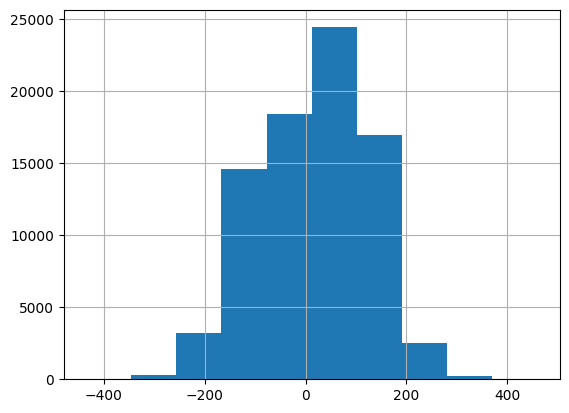

In [ ]:
ttd.cci.hist()

In [ ]:
# cci>200 and weekday == 4
ttd[(ttd.cci>200)& (ttd.Weekday==4)]

,Open,High,Low,Close,Adj Close_x,Volume,Ticker,Year,Month,Weekday,...,growth_brent_oil_7d,growth_brent_oil_30d,growth_brent_oil_90d,growth_brent_oil_365d,growth_btc_usd_1d,growth_btc_usd_3d,growth_btc_usd_7d,growth_btc_usd_30d,growth_btc_usd_90d,growth_btc_usd_365d
7113,40.450001,40.970001,40.250000,40.939999,34.912762,34567600.0,MSFT,2014,2014-05-01,4,...,0.997447,1.005607,1.021664,0.995813,NaN,NaN,NaN,NaN,NaN,NaN
7181,45.110001,45.930000,45.110001,45.910000,39.395618,36939400.0,MSFT,2014,2014-09-01,4,...,0.983610,0.941627,0.925124,0.914716,NaN,NaN,NaN,NaN,NaN,NaN
7340,45.660000,48.139999,45.650002,47.869999,41.630741,130933700.0,MSFT,2015,2015-04-01,4,...,1.082228,1.143658,1.055457,0.614516,0.978035,0.982994,1.037625,0.939362,0.933108,NaN
7452,44.270000,45.570000,43.919998,45.570000,40.151123,41839000.0,MSFT,2015,2015-10-01,4,...,1.007958,1.032390,0.775540,0.441114,0.998922,1.002560,1.009139,1.034930,0.909566,0.632660
7467,52.299999,54.070000,52.250000,52.869999,46.583046,135227100.0,MSFT,2015,2015-10-01,4,...,0.976399,0.996884,0.751370,0.435520,1.009025,1.026100,1.051840,1.200679,0.957738,0.771437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5072,2061.000000,2095.800049,2058.449951,2062.750000,2058.108887,2652761.0,LT.NS,2022,2022-11-01,4,...,0.891008,0.884318,0.782174,1.124210,0.995024,1.020511,0.989464,0.795450,0.824372,0.288467
5219,2420.000000,2483.500000,2415.050049,2475.550049,2469.979980,2690699.0,LT.NS,2023,2023-06-01,4,...,0.971214,0.973233,0.901866,0.870323,1.001048,0.993127,0.992891,1.119678,1.072726,1.540443
5234,2522.000000,2595.000000,2521.100098,2586.250000,2580.430908,4610417.0,LT.NS,2023,2023-07-01,4,...,1.011984,1.053541,1.003714,0.869197,1.003918,1.001748,0.985979,0.996052,1.075177,1.291138
5268,2888.000000,2928.699951,2872.449951,2901.600098,2901.600098,3638510.0,LT.NS,2023,2023-09-01,4,...,1.060358,1.076092,1.142983,0.751347,0.987251,1.004875,1.004067,0.876331,1.002105,1.340190


In [ ]:
high_cci_on_fridays = ttd[(ttd.cci>200)& (ttd.Weekday==4)]
high_cci_on_fridays.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 7113 to 5323
Columns: 202 entries, Open to growth_btc_usd_365d
dtypes: datetime64[ns](3), float64(128), int32(64), int64(5), object(2)
memory usage: 614.5+ KB


In [ ]:
high_cci_on_fridays.growth_future_5d.describe()

count    460.000000
mean       1.002279
std        0.031408
min        0.910510
25%        0.985062
50%        1.002609
75%        1.018036
max        1.154212
Name: growth_future_5d, dtype: float64

In [ ]:
# gross profit of total len(high_cci_on_fri) investments
#  round to thousands ==> 1
1000*(high_cci_on_fridays.growth_future_5d-1).sum()

1048.2628918177302

In [ ]:
# average result
1000*high_cci_on_fridays.growth_future_5d.mean()

1002.2788323735168

In [ ]:
1.002279*len(high_cci_on_fridays)

461.04833999999994

# Q5. [EXPLORE] Generate a better strategy to predict IPOs.
Let's assume you can get any data you want about the company that is going for an IPO. Discuss features you want to source to the dataset, how to define the 'success' of an IPO (compared with the price range? time period? your strategy?)?
Do you want to compare the new company with the Public (similar in some sense) companies?

You are not required to implement any coding, just a brief description of a data set and the strategy.